In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import tensorflow as tf 
import keras 


In [13]:
name_list = ['mpg','cylinder','displacement','power','weight','accelerate','year','place']

In [144]:
data_raw = pd.read_csv("/home/xiaotongfeng/Desktop/TensorFlow2-Examples/3_OilPrice_Regreesion/auto-mpg.data",names=name_list,sep=" ",comment='\t',skipinitialspace=True)

In [145]:
data_raw.head()

,mpg,cylinder,displacement,power,weight,accelerate,year,place
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [146]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinder      398 non-null    int64  
 2   displacement  398 non-null    float64
 3   power         398 non-null    object 
 4   weight        398 non-null    float64
 5   accelerate    398 non-null    float64
 6   year          398 non-null    int64  
 7   place         398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [147]:
data_raw.columns.values

array(['mpg', 'cylinder', 'displacement', 'power', 'weight', 'accelerate',
       'year', 'place'], dtype=object)

In [148]:
dataset = data_raw.copy()
dataset.isna().sum()

mpg             0
cylinder        0
displacement    0
power           0
weight          0
accelerate      0
year            0
place           0
dtype: int64

In [149]:
dataset = dataset.dropna()

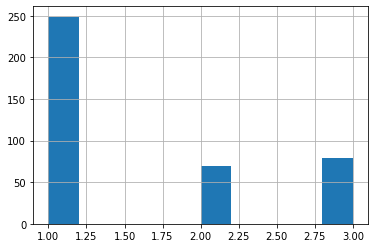

In [150]:
dataset['place'].hist()

In [151]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(dataset, train_size = 0.8, random_state = 42)

In [152]:
train_data.head()

,mpg,cylinder,displacement,power,weight,accelerate,year,place
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
18,27.0,4,97.0,88.00,2130.0,14.5,70,3
376,37.0,4,91.0,68.00,2025.0,18.2,82,3
248,36.1,4,91.0,60.00,1800.0,16.4,78,3
177,23.0,4,115.0,95.00,2694.0,15.0,75,2


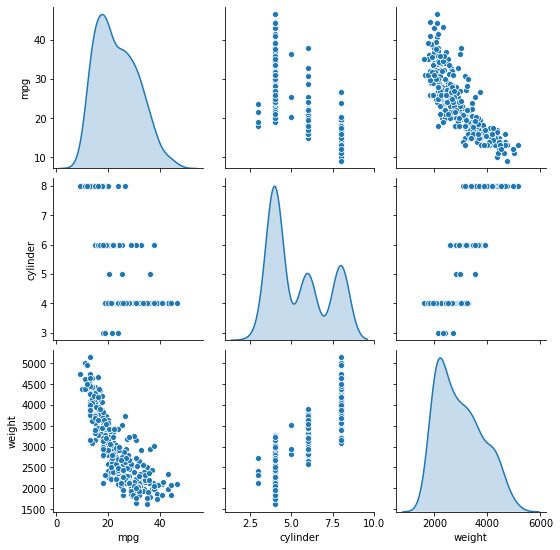

In [153]:
sns.pairplot(train_data[['mpg','cylinder','weight','power']],diag_kind='kde')

In [154]:
train_state = train_data.describe()
train_state

,mpg,cylinder,displacement,weight,accelerate,year,place
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.608176,5.430818,191.904088,2969.015723,15.639937,76.103774,1.591195
std,7.930574,1.684947,102.983802,840.617729,2.763269,3.603177,0.811696
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,98.500000,2220.000000,13.900000,73.000000,1.000000
50%,22.450000,4.000000,148.500000,2822.500000,15.500000,76.000000,1.000000
75%,29.725000,6.000000,259.500000,3597.250000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [155]:
train_data.head()

,mpg,cylinder,displacement,power,weight,accelerate,year,place
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
18,27.0,4,97.0,88.00,2130.0,14.5,70,3
376,37.0,4,91.0,68.00,2025.0,18.2,82,3
248,36.1,4,91.0,60.00,1800.0,16.4,78,3
177,23.0,4,115.0,95.00,2694.0,15.0,75,2


In [156]:
print(train_data.head())

drop_list = train_data[(train_data['power']=='?')].index.tolist()
print(drop_list)
train_data.drop(drop_list,axis=0,inplace=True)
drop_list = test_data[(test_data['power']=='?')].index.tolist()
print(drop_list)
test_data.drop(drop_list,axis=0,inplace=True)

nd = train_data.values 
# print(nd[:,2])

mpg  cylinder  displacement  power  weight  accelerate  year  place
3    16.0         8         304.0  150.0  3433.0        12.0    70      1
18   27.0         4          97.0  88.00  2130.0        14.5    70      3
376  37.0         4          91.0  68.00  2025.0        18.2    82      3
248  36.1         4          91.0  60.00  1800.0        16.4    78      3
177  23.0         4         115.0  95.00  2694.0        15.0    75      2
[336, 374, 32, 354, 330]
[126]


In [157]:
train_label = train_data.pop('mpg')
test_label = test_data.pop('mpg')

In [158]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_std = std.fit_transform(train_data)
test_std = std.fit_transform(test_data)

In [159]:
train_data

,cylinder,displacement,power,weight,accelerate,year,place
3,8,304.0,150.0,3433.0,12.0,70,1
18,4,97.0,88.00,2130.0,14.5,70,3
376,4,91.0,68.00,2025.0,18.2,82,3
248,4,91.0,60.00,1800.0,16.4,78,3
177,4,115.0,95.00,2694.0,15.0,75,2
...,...,...,...,...,...,...,...
71,3,70.0,97.00,2330.0,13.5,72,3
106,8,350.0,180.0,4499.0,12.5,73,1
270,4,134.0,95.00,2515.0,14.8,78,3
348,4,89.0,62.00,2050.0,17.3,81,3


In [160]:
print(train_std[0])

[ 1.51040727  1.07508267  1.25238452  0.54139086 -1.30971783 -1.69540513
 -0.72990021]


In [161]:
from keras import layers
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape = [7]),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])
model.compile(loss='mse',metrics=['mae','mse'],optimizer=tf.keras.optimizers.RMSprop(0.001))

In [162]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [163]:
class ProgressBar(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    # 显示进度条
    self.draw_progress_bar(epoch + 1, 1000)

  def draw_progress_bar(self, cur, total, bar_len=50):
    cur_len = int(cur / total * bar_len)
    sys.stdout.write("\r")
    sys.stdout.write("[{:<{}}] {}/{}".format("=" * cur_len, bar_len, cur, total))
    sys.stdout.flush()
y1 = model.fit(train_std,train_label,epochs=1000,validation_split=0.2,verbose=0, callbacks=[ProgressBar()])

[==================================================] 1000/1000

In [164]:
hist = pd.DataFrame(y1.history)
hist['epoch'] = y1.epoch
hist.tail(3)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
997,2.899647,1.086226,2.899647,9.473706,2.240330,9.473706,997
998,2.602269,1.034960,2.602269,9.363501,2.256970,9.363501,998
999,2.499918,1.015646,2.499918,8.763189,2.265249,8.763189,999


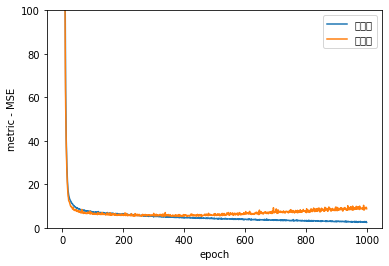

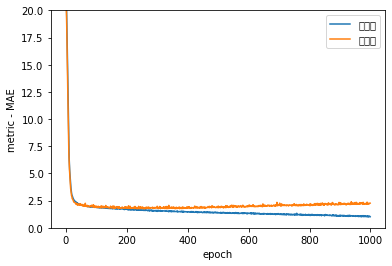

In [165]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('metric - MSE')
  plt.plot(hist['epoch'], hist['mse'], label='训练集')
  plt.plot(hist['epoch'], hist['val_mse'], label = '验证集')
  plt.ylim([0, 100])
  plt.legend()
  
  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('metric - MAE')
  plt.plot(hist['epoch'], hist['mae'], label='训练集')
  plt.plot(hist['epoch'], hist['val_mae'], label = '验证集')
  plt.ylim([0, 20])
  plt.legend()
  
plot_history(y1)

In [169]:
model2 = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape = [7]),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])
model2.compile(loss='mse',metrics=['mae','mse'],optimizer=tf.keras.optimizers.RMSprop(0.001))
y2 = model2.fit(train_std,train_label,epochs=1000,validation_split=0.2,verbose=0, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',patience =10),ProgressBar()])

[===                                               ] 78/1000

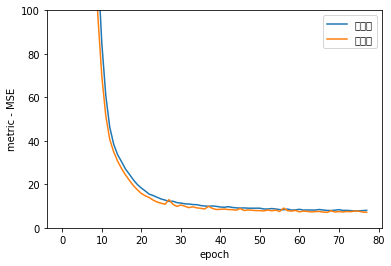

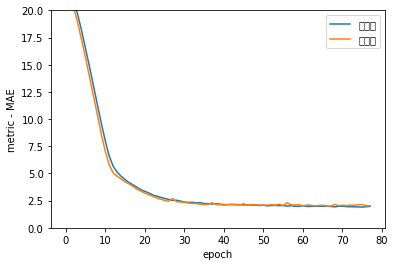

In [170]:
plot_history(y2)

In [172]:
loss, mae, mse = model.evaluate(test_std, test_label, verbose=0)
print("测试集平均绝对误差(MAE): {:5.2f} MPG".format(mae))

测试集平均绝对误差(MAE):  1.92 MPG


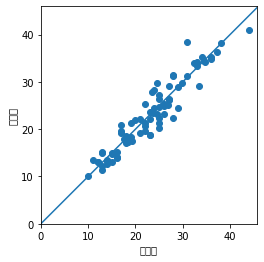

In [173]:
test_pred = model2.predict(test_std).flatten()

plt.scatter(test_label, test_pred)
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])